In [29]:
# Cria os arquivos dos meses a partir do documento completo

# Importa a biblioteca
import pandas as pd

# Importa o documento csv com todas os dados.
df = pd.read_csv('/content/SINASC_RO_2019.csv')

# Coloco em uma lista as colunas que serão utilizadas.
colunas = ['IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC', 'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI']

# Seleção das colunas utilizadas
df_1 = df[colunas]

# Dicionário com os meses e datas correspondentes
meses = {
    1: ['Jan', '2019-02-01'],
    2: ['Fev','2019-03-01'],
    3: ['Mar','2019-04-01'],
    4: ['Abr','2019-05-01'],
    5: ['Mai','2019-06-01'],
    6: ['Jun','2019-07-01'],
    7: ['Jul','2019-08-01'],
    8: ['Ago','2019-09-01'],
    9: ['Set','2019-10-01'],
    10: ['Out','2019-11-01'],
    11: ['Nov','2019-12-01'],
    12: ['Dez','2020-01-01']
}

# Seleção do mês do relatório
print(f'Digite o mês que deseja fazer o csv:\n\n jan: 1, fev: 2, mar: 3, abr: 4, mai: 5, jun: 6, jul: 7, ago: 8, set: 9, out: 10, nov: 11, dez: 12')
mes = int(input())

data_filtro = meses[mes][1]

# Filtra os meses
df_mes = df_1[df_1['DTNASC']<meses[mes][1]]

# Reseta o index
df_mes = df_mes.reset_index()

# Remove o index velho
df_mes = df_mes.drop(columns='index')

# Nome do arquivo que será salvo
arquivo = 'SINASC_' + meses[mes][0] + '.csv'

# Salva os dados em um arquivo csv
df_mes.to_csv(arquivo)

print('Arquivo criado com sucesso!!!!')

Digite o mês que deseja fazer o csv:

 jan: 1, fev: 2, mar: 3, abr: 4, mai: 5, jun: 6, jul: 7, ago: 8, set: 9, out: 10, nov: 11, dez: 12
2
Arquivo criado com sucesso!!!!


Digite o mês que deseja fazer o relatório:

 jan: 1, fev: 2, mar: 3, abr: 4, mai: 5, jun: 6, jul: 7, ago: 8, set: 9, out: 10, nov: 11, dez: 12
2


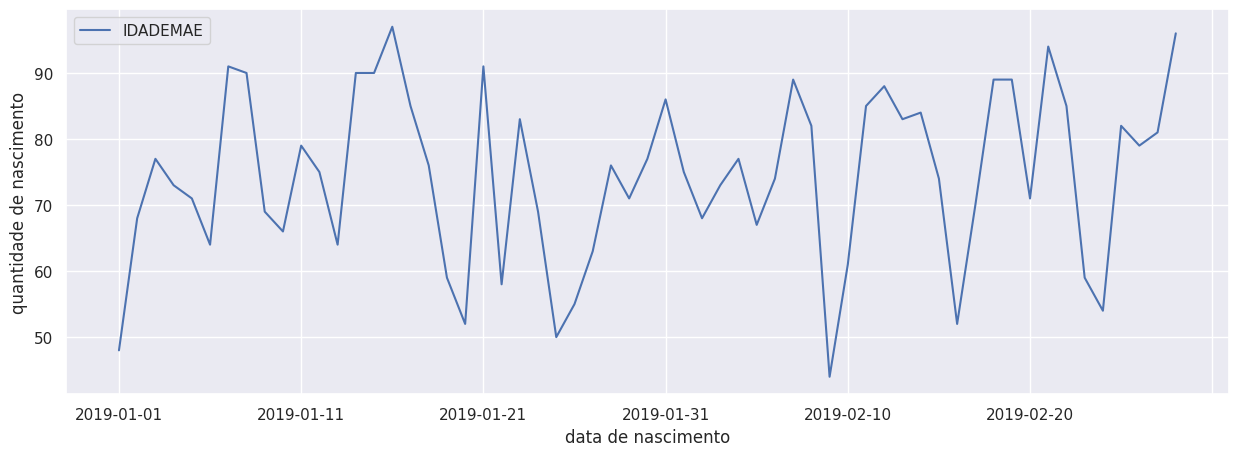

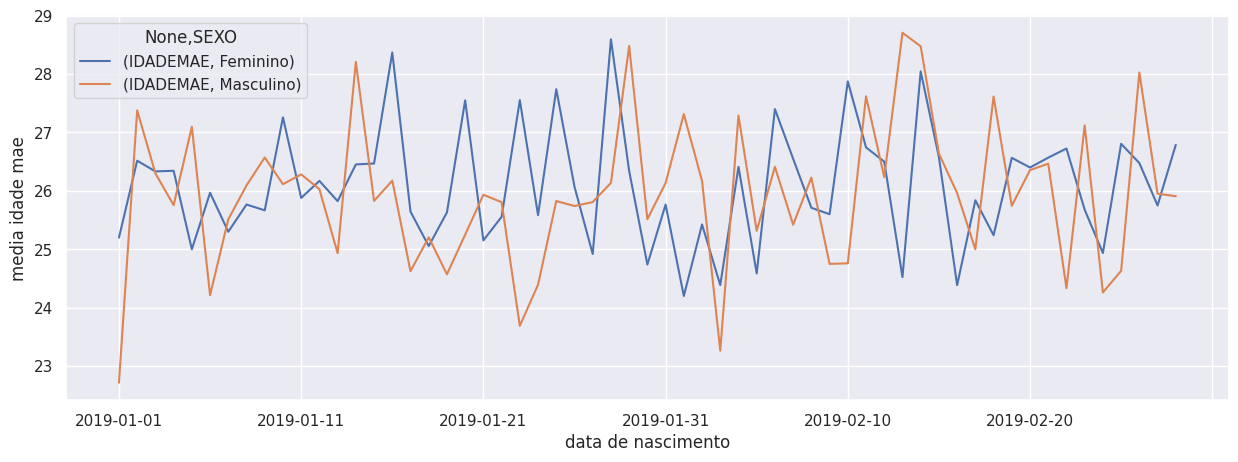

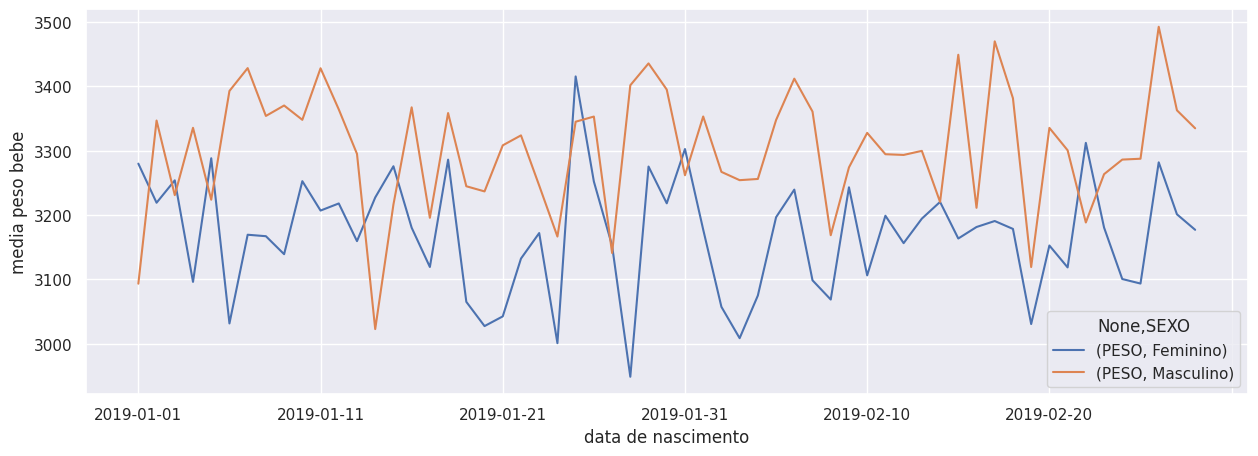

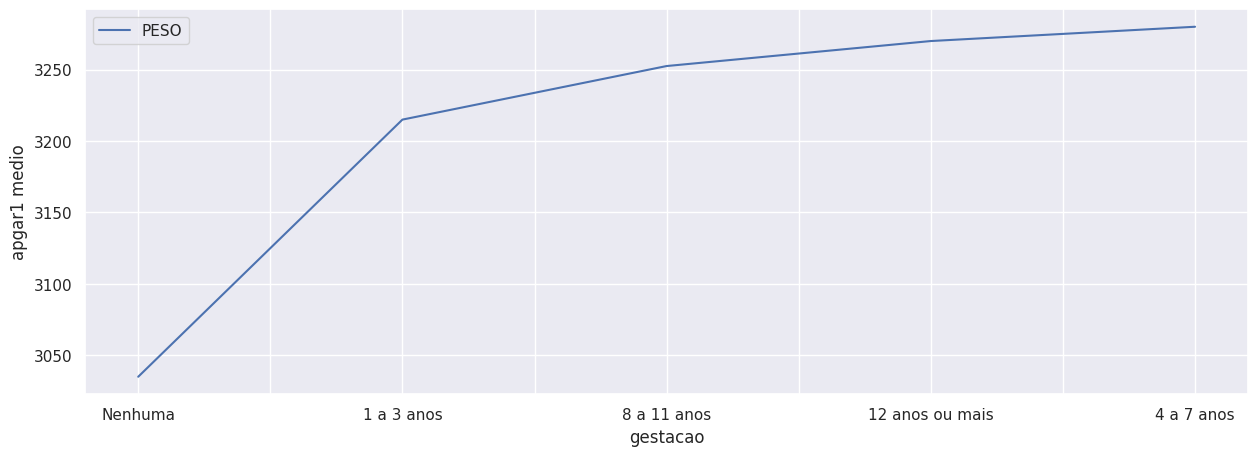

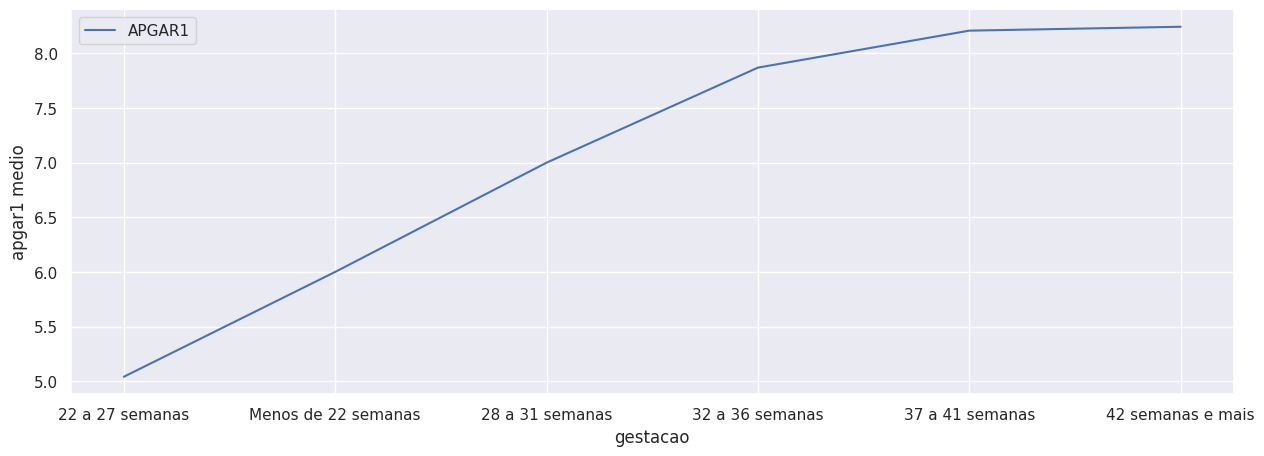

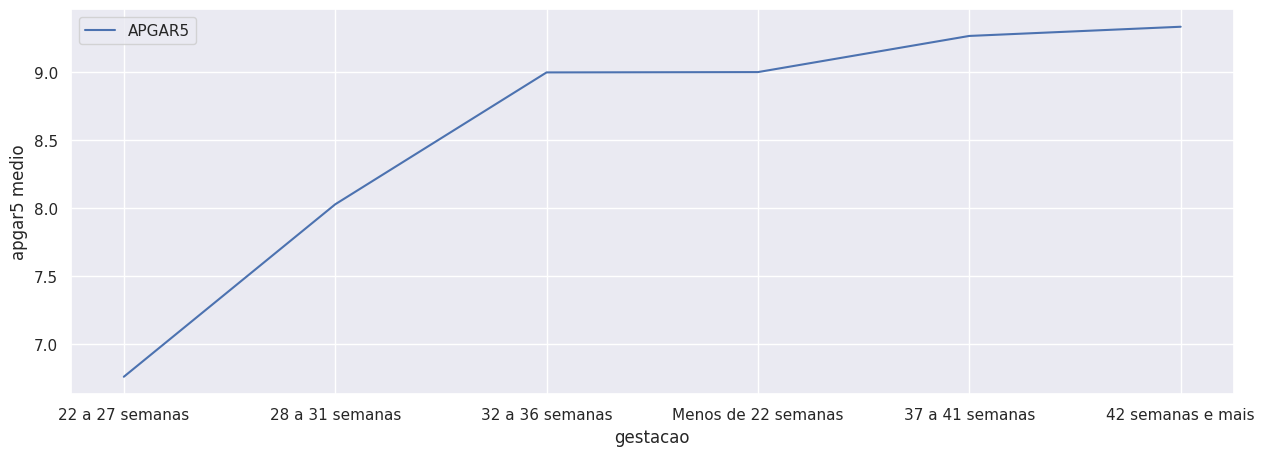

In [30]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()

################################################################################
# Escolhendo o mês

# Dicionário com os meses e datas correspondentes
meses = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}

# Seleção do mês do relatório
print(f'Digite o mês que deseja fazer o relatório:\n\n jan: 1, fev: 2, mar: 3, abr: 4, mai: 5, jun: 6, jul: 7, ago: 8, set: 9, out: 10, nov: 11, dez: 12')
mes = int(input())

################################################################################
# Importa o arquivo CSV
caminho = r'/content/SINASC_' + meses[mes] + '.csv'

sinasc = pd.read_csv(caminho)

################################################################################
# Função que gera gráficos

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
  if opcao == 'nada':
    pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15,5])
  elif opcao == 'unstack':
    pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15,5])
  elif opcao == 'sort':
    pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15,5])
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  return None

################################################################################
# Variável que vai indicar o nome da pasta onde os gráficos serão salvos

max_data = sinasc.DTNASC.max()[:7]

################################################################################
# Cria o diretório onde serão salvas as figuras

os.makedirs('/content/output/figs/'+max_data, exist_ok=True)

################################################################################
# Roda a função e salva a figura na pasta criada

plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('/content/output/figs/'+max_data+'/quantidade_nascimento.png')
plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('/content/output/figs/'+max_data+'/media_idade_mae_sexo.png')
plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('/content/output/figs/'+max_data+'/media_peso_bebe_sexo.png')
plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('/content/output/figs/'+max_data+'/media_apgar1_escolaridade_mae.png')
plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('/content/output/figs/'+max_data+'/media_apgar1_gestacao.png')
plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('/content/output/figs/'+max_data+'/media_apgar5_gestacao.png')

# Considerações



1.   Para melhorar ainda mais a automatização do gerador de relatório poderia ser
colocado como *input* o ano do arquivo, pois do modo como foi realizado o código, ele só funcionaria para o ano de 2019, para os demais anos seria necessária realizar modificações no código.

2.   Ao fazer tal ajuste seria necessário realizar uma modificação no código do dicionário, pois ele está com valores fixos, talvez um associando o ano com um laço de repetição e as datas para os filtros dos meses.

3.   Tais modificações descritas acima seriam dispensáveis se no segundo bloco de código fosse inserido o caminho do arquivo que se deseja desenvolver.

4. Poderiam ser inseridos laços de repetição no código, automatizando-o ainda mais, passando como parâmetro os apenas os meses que se deseja analisar, talvez uma opção de trimestre/quadrimestre/semestal/anual.